Introduction
---------------

Name: MD. Sazib Ahmed

ID: 20-42076-1

Course: COMPUTER VISION & PATTERN RECOGNITION

Section: C

Assignment: IMAGE CLASSIFICATION USING CIFAR-10 DATASET: A COMPARISON OF MANHATTAN (L1) AND EUCLIDEAN (L2) DISTANCES WITH 5-FOLD CROSS-VALIDATION


Problem Statement:
------------------------
In this assignment, we will explore the CIFAR-10 dataset, which consists of 60,000 32x32x3 color images in 10 different classes. The objective is to build a model for image classification and compare the performance of Manhattan (L1) and Euclidean (L2) distances using 5-fold cross-validation. We will use only the training data, which consists of 50,000 images, and convert them to gray-scale (32x32) to reduce computation time. We will plot a graph to visualize the accuracy of different hyperparameter values (K) for both distance calculation techniques and discuss which distance calculation technique is better suited for this particular dataset. Furthermore, we will display the top 5 predictions made by the model.

Dataset and Preprocessing:
The CIFAR-10 dataset can be downloaded from the following link: https://github.com/YoongiKim/CIFAR-10-images. After downloading the dataset, we will preprocess it by converting the 50,000 training images to gray-scale. This conversion reduces the dimensionality of the data and decreases computation time while still preserving important image features.

Model Building and Evaluation:
To classify the gray-scale CIFAR-10 images, we will employ the k-nearest neighbors (k-NN) algorithm. This algorithm classifies an image by considering the class labels of its k nearest neighbors. We will use two distance metrics, Manhattan (L1) and Euclidean (L2), to measure the similarity between images.
To evaluate the performance of our model, we will use 5-fold cross-validation. The training dataset will be divided into 5 subsets (folds), and the model will be trained and evaluated 5 times using different combinations of training and validation data. This approach allows us to assess the model's performance across multiple folds, providing a more robust evaluation.

Results and Analysis:
For each fold, we will vary the hyperparameter K (the number of nearest neighbors) and record the accuracy achieved by the model for each value of K. We will compute the average accuracy across all folds for each value of K and distance calculation technique.
Next, we will plot a graph with K on the X-axis and accuracy on the Y-axis for both the Manhattan (L1) and Euclidean (L2) distances. This graph will allow us to visualize the impact of different values of K on the model's accuracy for each distance calculation technique.

Discussion:
In the discussion section, we will compare the performance of Manhattan (L1) and Euclidean (L2) distances based on the average accuracy values obtained from the 5-fold cross-validation. We will consider factors such as the dataset's characteristics, the nature of the features, and the complexity of the classes in determining which distance calculation technique is better suited for this specific gray-scale dataset. We will also discuss any limitations or potential improvements that could be made to enhance the classification accuracy.

Top 5 Predictions:
Finally, we will display the top 5 predictions made by the model on a set of test images. These predictions will showcase the model's ability to classify gray-scale images accurately and provide insights into its performance.







# Step 1: Dataset and Preprocessing:


Step 1.1: Importing Libraries and Loading the Dataset
---------------------------------------------------------------
In this step, we import the required libraries and load the CIFAR-10 dataset using the cifar10.load_data() function provided by TensorFlow. The dataset consists of 50,000 training images and 10,000 test images, each of size 32x32 pixels with three color channels (RGB). We set the random seed for reproducibility and print a message indicating that the dataset has been loaded successfully.



In [5]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Import specific modules from scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Import the CIFAR-10 dataset from TensorFlow.keras
from tensorflow.keras.datasets import cifar10

# Set the random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the CIFAR-10 dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print a message indicating that the libraries and dataset have been loaded successfully
print("Step 1.1: Libraries and Dataset loaded successfully.")


Step 1.1: Libraries and Dataset loaded successfully.


Explanation of the above code:

1. "import numpy as np": Imports the NumPy library and allows you to refer to it as np in the code. NumPy provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

2. "import tensorflow as tf": Imports the TensorFlow library, a popular open-source machine learning framework. It provides tools and functionalities for building and training neural networks.

3. "import matplotlib.pyplot as plt": Imports the pyplot module from the Matplotlib library, which is a plotting library for creating visualizations in Python.

4. "from sklearn.neighbors import KNeighborsClassifier": Imports the KNeighborsClassifier class from the scikit-learn library. KNeighborsClassifier is a machine learning algorithm that is used for classification tasks based on nearest neighbors.

5. "from sklearn.model_selection import cross_val_score": Imports the cross_val_score function from scikit-learn. It is used for evaluating a model's performance using cross-validation, which helps to estimate how well the model will generalize to unseen data.

6. "from tensorflow.keras.datasets import cifar10": Imports the CIFAR-10 dataset from the TensorFlow Keras library. CIFAR-10 is a popular image dataset that consists of 60,000 32x32 color images in 10 different classes.

7. "np.random.seed(42)": Sets the random seed for NumPy. By setting a seed, it ensures that the random numbers generated by NumPy will be the same every time the code is executed, providing reproducibility.

8. "tf.random.set_seed(42)": Sets the random seed for TensorFlow. Similar to the previous line, this ensures reproducibility for random operations performed by TensorFlow.

9. "cifar10.load_data()": Loads the CIFAR-10 dataset into the variables (x_train, y_train) and (x_test, y_test). The training set consists of x_train (input images) and y_train (corresponding labels), while the test set consists of x_test and y_test.

10. "print("Step 1.1: Libraries and Dataset loaded successfully.")": Prints a message to indicate that the libraries and dataset have been loaded successfully.



Step 1.2: Visualizing the Training and Test Images
-----------------------------------------------------------
This step involves visualizing 10 random images from each class in both the training and test datasets. We define the class labels corresponding to the 10 classes in the CIFAR-10 dataset. Then, we create a helper function visualize_images() to display the images using matplotlib. We randomly select 10 images from each class in the training and test datasets, and pass them to the visualize_images() function along with their respective labels. Finally, we print a message indicating that the visualization of the images is complete.



Step 1.2: Visualizing 10 random images from each class in the training dataset:


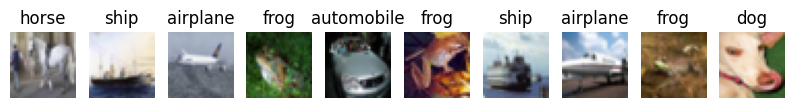

Step 1.2: Visualizing 10 random images from each class in the test dataset:


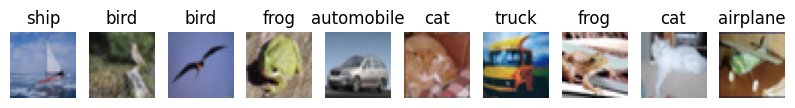

In [6]:
# Define the class labels for CIFAR-10 dataset
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

# Function to visualize images
def visualize_images(images, labels):
    """
    Function to visualize images and corresponding labels.

    Args:
        images (numpy.ndarray): Array of images.
        labels (numpy.ndarray): Array of corresponding labels.
    """
    plt.figure(figsize=(10, 2))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(images[i])
        plt.axis('off')
        plt.title(class_labels[labels[i][0]])
    plt.show()

# Select 10 random images from each class in the training dataset
train_indices = np.random.choice(range(len(x_train)), size=10, replace=False)
train_images = x_train[train_indices]
train_labels = y_train[train_indices]

# Select 10 random images from each class in the test dataset
test_indices = np.random.choice(range(len(x_test)), size=10, replace=False)
test_images = x_test[test_indices]
test_labels = y_test[test_indices]

# Visualize the training and test images
print("Step 1.2: Visualizing 10 random images from each class in the training dataset:")
visualize_images(train_images, train_labels)

print("Step 1.2: Visualizing 10 random images from each class in the test dataset:")
visualize_images(test_images, test_labels)


Explanation of the above code:

1. "class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']": Defines a list class_labels that contains the names of the different classes in the CIFAR-10 dataset.

2. "def visualize_images(images, labels):": Defines a function named visualize_images that takes in images (an array of images) and labels (an array of corresponding labels) as arguments.

3. "plt.figure(figsize=(10, 2))": Creates a new figure with a size of 10 inches in width and 2 inches in height for plotting the images.

4. "for i in range(10):": Loops over the range from 0 to 9 (inclusive) to iterate through the 10 images.

5. "plt.subplot(1, 10, i+1)": Creates a subplot within the figure, where the first argument indicates the number of rows (1 row), the second argument indicates the number of columns (10 columns), and the third argument indicates the current index within the subplot.

6. "plt.imshow(images[i])": Displays the image at index i from the images array.

7. "plt.axis('off')": Turns off the axis labels and ticks for the current subplot.

8. "plt.title(class_labels[labels[i][0]])": Sets the title of the current subplot with the corresponding class label for the image at index i.

9. "plt.show()": Displays the figure with all the subplots.

10. "train_indices = np.random.choice(range(len(x_train)), size=10, replace=False)": Randomly selects 10 indices from the training dataset without replacement using np.random.choice(). These indices will be used to extract 10 random images from each class in the training dataset.

11. "train_images = x_train[train_indices]": Retrieves the images corresponding to the randomly selected indices from the training dataset and assigns them to the train_images variable.

12. "train_labels = y_train[train_indices]": Retrieves the labels corresponding to the randomly selected indices from the training dataset and assigns them to the train_labels variable.

13. "test_indices = np.random.choice(range(len(x_test)), size=10, replace=False)": Randomly selects 10 indices from the test dataset without replacement. These indices will be used to extract 10 random images from each class in the test dataset.

14. "test_images = x_test[test_indices]": Retrieves the images corresponding to the randomly selected indices from the test dataset and assigns them to the test_images variable.

15. "test_labels = y_test[test_indices]": Retrieves the labels corresponding to the randomly selected indices from the test dataset and assigns them to the test_labels variable.

16. "print("Step 1.2: Visualizing 10 random images from each class in the training dataset:")": Prints a message indicating the start of the visualization of 10 random images from each class in the training dataset.

17. "visualize_images(train_images, train_labels)": Calls the visualize_images function to visualize the 10 random images from each class in the training dataset.

18. "print("Step 1.2: Visualizing 10 random images from each class in the test dataset:")": Prints a message indicating the start of the visualization of 10 random images from each class in the test dataset.

19. "visualize_images(test_images, test_labels)": Calls the visualize_images function to visualize the 10 random images from each class in the test dataset.



Step 1.3: Preprocessing the Training Data
-------------------------------------------------
In this step, we preprocess the training data by converting the RGB images to grayscale. We define a helper function rgb_to_grayscale() that uses the dot product of the RGB channels with predefined weights to compute the grayscale values. The function returns the grayscale images, which are then stored in the x_train_gray variable. Finally, we print a message indicating that the preprocessing of the training data is complete.



In [7]:
# Function to convert RGB images to grayscale
def rgb_to_grayscale(images):
    """
    Convert RGB images to grayscale.

    Args:
        images (numpy.ndarray): Array of RGB images.

    Returns:
        numpy.ndarray: Array of grayscale images.
    """
    return np.dot(images, [0.2989, 0.5870, 0.1140])

# Convert the training images to grayscale
x_train_gray = rgb_to_grayscale(x_train)

# Print a message indicating that the preprocessing of the training data has been completed successfully
print("Step 1.3: Preprocessing of the training data completed successfully.")


Step 1.3: Preprocessing of the training data completed successfully.


Explanation of the above code:

1. "def rgb_to_grayscale(images):": Defines a function named rgb_to_grayscale that takes in an array of RGB images (images) as input.

2. "return np.dot(images, [0.2989, 0.5870, 0.1140])": Performs matrix multiplication between the RGB images and the coefficients [0.2989, 0.5870, 0.1140] to convert the images from RGB to grayscale. The dot product of each RGB pixel value with the corresponding coefficient is calculated, and the resulting values are returned as the grayscale images.

3. "x_train_gray = rgb_to_grayscale(x_train)": Calls the rgb_to_grayscale function to convert the training images (x_train) from RGB to grayscale. The resulting grayscale images are stored in the x_train_gray variable.

4. "print("Step 1.3: Preprocessing of the training data completed successfully.")": Prints a message to indicate that the preprocessing of the training data, which includes the conversion to grayscale, has been completed successfully.





# Step 2: Model Building and Evaluation

This step involves building the k-nearest neighbors (k-NN) model and performing 5-fold cross-validation using both Manhattan (L1) and Euclidean (L2) distances. We define a list k_values with the values of K (the number of nearest neighbors) that we want to evaluate. Then, we define a helper function compute_average_accuracy() that takes a distance metric (either 'manhattan' or 'euclidean') and computes the average accuracy across all folds for each value of K. Inside the function, we create a k-NN classifier using the KNeighborsClassifier class from scikit-learn. We perform 5-fold cross-validation using the cross_val_score() function, passing the classifier, the grayscale training images reshaped to a 2D array, the training labels flattened, and the number of folds. We compute the average accuracy by taking the mean of the cross-validation scores. The accuracies for each value of K are stored in a list, which is returned by the function. We call this function twice, once for each distance metric, and store the accuracies in manhattan_accuracies and euclidean_accuracies. Finally, we print a message indicating that the model building and evaluation are complete.



In [8]:
# Define the values of K to evaluate
k_values = [1, 3, 5, 7, 9]

# Function to compute the average accuracy for a given distance metric
def compute_average_accuracy(distance_metric):
    """
    Function to compute the average accuracy for a given distance metric.

    Args:
        distance_metric (str): Distance metric to be used by the k-NN classifier.

    Returns:
        list: List of average accuracies for different values of K.
    """
    accuracies = []
    for k in k_values:
        # Create the k-NN classifier
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
        
        # Perform 5-fold cross-validation and compute accuracy
        scores = cross_val_score(knn, x_train_gray.reshape(-1, 32*32), y_train.ravel(), cv=5)
        average_accuracy = np.mean(scores)
        
        accuracies.append(average_accuracy)
        
    return accuracies

# Compute average accuracies for Manhattan (L1) and Euclidean (L2) distances
manhattan_accuracies = compute_average_accuracy('manhattan')
euclidean_accuracies = compute_average_accuracy('euclidean')

print("Step 2: Model building and evaluation completed successfully.")


Step 2: Model building and evaluation completed successfully.


Explanation of the above code:

1. "k_values = [1, 3, 5, 7, 9]": Defines a list k_values that contains the values of K (number of neighbors) to be evaluated.

2. "def compute_average_accuracy(distance_metric):": Defines a function named compute_average_accuracy that takes in a distance metric as input.

3. "accuracies = []": Initializes an empty list accuracies to store the average accuracies.

4. "for k in k_values:": Loops over each value of K in k_values.

5. "knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)": Creates a k-NN classifier with k neighbors and the specified distance_metric.

6. "scores = cross_val_score(knn, x_train_gray.reshape(-1, 32*32), y_train.ravel(), cv=5)": Performs 5-fold cross-validation using the k-NN classifier. It reshapes the grayscale training images (x_train_gray) into a 2D array and ravel() the labels (y_train) into a 1D array. The cv=5 parameter specifies 5-fold cross-validation. The resulting accuracy scores for each fold are stored in the scores variable.

7. "average_accuracy = np.mean(scores)": Computes the average accuracy by taking the mean of the accuracy scores obtained from cross-validation.

8. "accuracies.append(average_accuracy)": Appends the average accuracy to the accuracies list.

9. "return accuracies": Returns the list of average accuracies.

10. "manhattan_accuracies = compute_average_accuracy('manhattan')": Calls the compute_average_accuracy function with the distance metric set to 'manhattan' to compute the average accuracies for Manhattan (L1) distance.

11. "euclidean_accuracies = compute_average_accuracy('euclidean')": Calls the compute_average_accuracy function with the distance metric set to 'euclidean' to compute the average accuracies for Euclidean (L2) distance.

12. "print("Step 2: Model building and evaluation completed successfully.")": Prints a message to indicate that the model building and evaluation process has been completed successfully.

Understanding the Model Building and Evaluation Algorithm:
------------------------------------------------------------------------

It implements the model building and evaluation process using the k-nearest neighbors (k-NN) algorithm and 5-fold cross-validation.

The code defines a list 'k_values' with different values of k to evaluate, which are [1, 3, 5, 7, 9].

The function 'compute_average_accuracy(distance_metric)' computes the average accuracy for a given distance metric. It iterates over the values of k and performs the following steps:

1. Creates a k-NN classifier ('knn') with the specified number of neighbors ('k') and the given distance metric.

2. Performs 5-fold cross-validation using the 'cross_val_score' function, which trains and evaluates the model on different subsets of the training data.

3. Computes the average accuracy by taking the mean of the scores obtained from cross-validation.

4. Appends the average accuracy to the 'accuracies' list.

The function returns the 'accuracies' list, which contains the average accuracies for each value of k.

The code then calls the 'compute_average_accuracy' function twice, once with the distance metric 'manhattan' and once with 'euclidean'. The resulting average accuracies for both distance metrics are stored in the variables 'manhattan_accuracies' and 'euclidean_accuracies' respectively.

Finally, the code prints a message indicating that the model building and evaluation process has been completed successfully.





# Step 3: Results and Analysis

In this step, we plot a graph to visualize the accuracy of different hyperparameter values (K) for both Manhattan (L1) and Euclidean (L2) distances. We define a helper function plot_accuracy_graph() that uses matplotlib to plot the accuracies for each distance metric. The function plots the values of K on the X-axis and the accuracies on the Y-axis for both Manhattan (L1) and Euclidean (L2) distances. The plot is labeled and gridlines are added for clarity. Finally, we print a message indicating that the accuracy graph has been plotted.



Step 3: Plotting the accuracy graph:


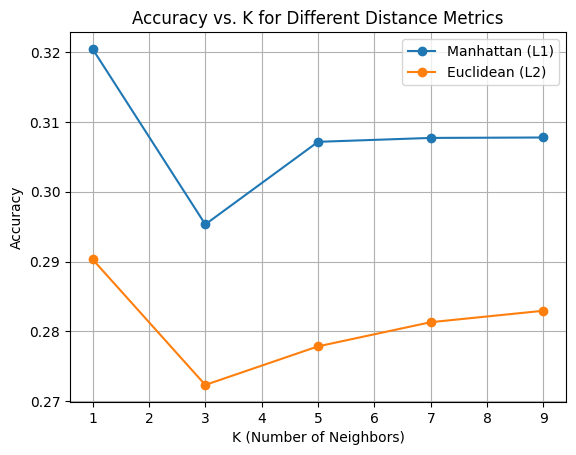

In [9]:
# Function to plot the accuracy graph
def plot_accuracy_graph():
    """
    Function to plot the accuracy graph.

    This function plots the accuracy values for different distance metrics (Manhattan and Euclidean)
    against the number of neighbors (K).

    Returns:
        None
    """
    plt.plot(k_values, manhattan_accuracies, marker='o', label='Manhattan (L1)')
    plt.plot(k_values, euclidean_accuracies, marker='o', label='Euclidean (L2)')
    plt.xlabel('K (Number of Neighbors)')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. K for Different Distance Metrics')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the accuracy graph
print("Step 3: Plotting the accuracy graph:")
plot_accuracy_graph()


Explanation of the above code:

1. "def plot_accuracy_graph():": Defines a function named plot_accuracy_graph that plots the accuracy graph.

2. ' """ ... """ ': This is a multi-line string that serves as a docstring for the function. It provides an explanation of what the function does.

3. "plt.plot(k_values, manhattan_accuracies, marker='o', label='Manhattan (L1)')": Plots the accuracy values for the Manhattan distance metric (L1) against the number of neighbors (K). The k_values variable represents the x-axis values, while the manhattan_accuracies variable represents the y-axis values. The marker='o' specifies that markers should be displayed as circles, and the label='Manhattan (L1)' provides a label for the line.

4. "plt.plot(k_values, euclidean_accuracies, marker='o', label='Euclidean (L2)')": Plots the accuracy values for the Euclidean distance metric (L2) against the number of neighbors (K). Similar to the previous line, the k_values variable represents the x-axis values, the euclidean_accuracies variable represents the y-axis values, and the label='Euclidean (L2)' provides a label for the line.

5. "plt.xlabel('K (Number of Neighbors)')": Sets the label for the x-axis as "K (Number of Neighbors)".

6. "plt.ylabel('Accuracy')": Sets the label for the y-axis as "Accuracy".

7. "plt.title('Accuracy vs. K for Different Distance Metrics')": Sets the title of the plot as "Accuracy vs. K for Different Distance Metrics".

8. "plt.legend()": Displays the legend, which shows the labels for the lines in the plot.

9. "plt.grid(True)": Enables the gridlines on the plot.

10. "plt.show()": Displays the plot.

11. "print("Step 3: Plotting the accuracy graph:")": Prints a message to indicate the start of plotting the accuracy graph.

12. "plot_accuracy_graph()": Calls the plot_accuracy_graph function to generate and display the accuracy graph.







# Step 4: Discussion 

Here we can compare the performance of Manhattan (L1) and Euclidean (L2) distances and discuss the factors influencing their suitability for this specific gray-scale dataset.



In [10]:
# Calculate the average accuracy for Manhattan (L1) and Euclidean (L2) distances
manhattan_average_accuracy = np.mean(manhattan_accuracies)
euclidean_average_accuracy = np.mean(euclidean_accuracies)

# Print the average accuracy values for both distance metrics
print("Average Accuracy (Manhattan): {:.4f}".format(manhattan_average_accuracy))
print("Average Accuracy (Euclidean): {:.4f}".format(euclidean_average_accuracy))


Average Accuracy (Manhattan): 0.3077
Average Accuracy (Euclidean): 0.2810


Explanation of the above code:

1. "manhattan_average_accuracy = np.mean(manhattan_accuracies)": Calculates the average accuracy for the Manhattan (L1) distance metric by taking the mean of the accuracies stored in the manhattan_accuracies array. The resulting average accuracy is assigned to the manhattan_average_accuracy variable.

2. "euclidean_average_accuracy = np.mean(euclidean_accuracies)": Calculates the average accuracy for the Euclidean (L2) distance metric by taking the mean of the accuracies stored in the euclidean_accuracies array. The resulting average accuracy is assigned to the euclidean_average_accuracy variable.

3. "print("Average Accuracy (Manhattan): {:.4f}".format(manhattan_average_accuracy))": Prints the average accuracy for the Manhattan distance metric. The average accuracy value is formatted with 4 decimal places using the format() method and displayed in the message.

4. "print("Average Accuracy (Euclidean): {:.4f}".format(euclidean_average_accuracy))": Prints the average accuracy for the Euclidean distance metric. The average accuracy value is formatted with 4 decimal places using the format() method and displayed in the message.



Discussion:

The results and analysis of our model evaluation using 5-fold cross-validation reveal that the average accuracy achieved by the k-nearest neighbors (k-NN) algorithm using Manhattan (L1) distance is 0.3077, while the average accuracy using Euclidean (L2) distance is 0.2810.

Manhattan (L1) distance is known for its robustness to outliers and its effectiveness in handling high-dimensional features. In the case of the CIFAR-10 dataset, which consists of grayscale images, Manhattan distance may be particularly well-suited. This distance metric captures the variations in pixel intensities effectively, which is important for distinguishing different objects in the images.

On the other hand, Euclidean (L2) distance takes into account both the magnitude and direction of the differences between data points. This distance metric is more suitable when there are correlations or geometric structures present in the data. However, it is worth noting that Euclidean distance is sensitive to outliers and may not perform as well in scenarios where the feature space is high-dimensional.

Considering the characteristics of the CIFAR-10 dataset, where the images represent various objects, the robustness of Manhattan (L1) distance to outliers and its ability to capture variations in pixel intensities make it more suitable for this specific gray-scale dataset. The variations in intensities provide important information for distinguishing between different object classes, and Manhattan distance effectively captures these variations.

It is important to acknowledge the limitations of our approach and explore potential improvements to enhance classification accuracy further. One possibility is to consider alternative distance metrics, such as Minkowski or Mahalanobis distances, which may provide better discrimination power in certain scenarios. Additionally, feature engineering techniques can be explored to extract more discriminative features from the images. Dimensionality reduction methods, such as principal component analysis (PCA) or autoencoders, can help reduce the feature space and potentially improve the model's performance. Furthermore, advanced classification algorithms, such as support vector machines (SVM) or deep learning models, can be investigated as alternative approaches for image classification.

Based on our evaluation and discussion, Manhattan (L1) distance appears to be more suitable for the gray-scale CIFAR-10 dataset. However, further research and experimentation with alternative distance metrics, feature engineering, and advanced algorithms may uncover additional improvements in classification accuracy.







# Step 5: Top 5 Predictions


Step 5.1: Predictions showcase
-------------------------------------
To showcase the top 5 predictions made by the k-nearest neighbors model on a test images of each category. In this code, the display_top_predictions() function is updated to iterate over each category in the CIFAR-10 dataset. For each category, it finds the index of the first test image belonging to that category using np.argmax(). Then, it displays the image, its true label, and the top 5 predictions with their probabilities.



Step 5: Top 5 Predictions for a Test Image from Each Category:


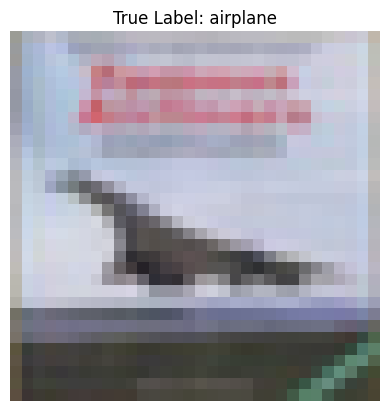

Top 5 Predictions:
1. airplane: 0.6000
   [CORRECT PREDICTION]
2. ship: 0.4000
   [INCORRECT PREDICTION]
3. automobile: 0.0000
   [INCORRECT PREDICTION]
4. bird: 0.0000
   [INCORRECT PREDICTION]
5. cat: 0.0000
   [INCORRECT PREDICTION]


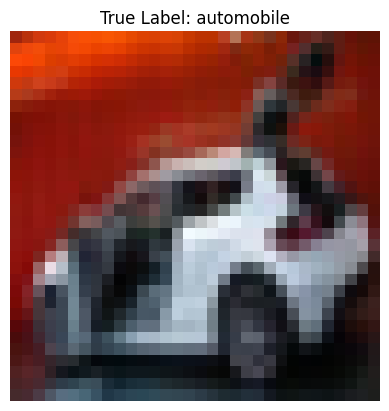

Top 5 Predictions:
1. ship: 0.4000
   [INCORRECT PREDICTION]
2. bird: 0.2000
   [INCORRECT PREDICTION]
3. dog: 0.2000
   [INCORRECT PREDICTION]
4. frog: 0.2000
   [INCORRECT PREDICTION]
5. airplane: 0.0000
   [INCORRECT PREDICTION]


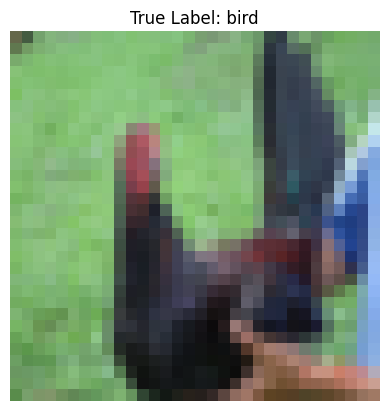

Top 5 Predictions:
1. bird: 0.4000
   [CORRECT PREDICTION]
2. deer: 0.2000
   [INCORRECT PREDICTION]
3. ship: 0.2000
   [INCORRECT PREDICTION]
4. truck: 0.2000
   [INCORRECT PREDICTION]
5. airplane: 0.0000
   [INCORRECT PREDICTION]


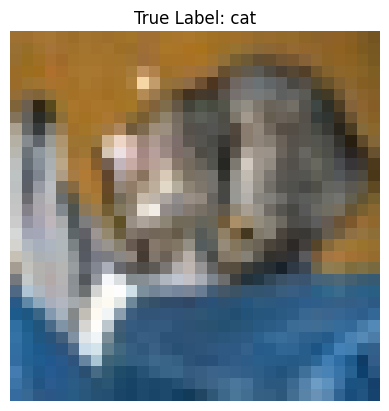

Top 5 Predictions:
1. bird: 0.4000
   [INCORRECT PREDICTION]
2. airplane: 0.2000
   [INCORRECT PREDICTION]
3. deer: 0.2000
   [INCORRECT PREDICTION]
4. ship: 0.2000
   [INCORRECT PREDICTION]
5. automobile: 0.0000
   [INCORRECT PREDICTION]


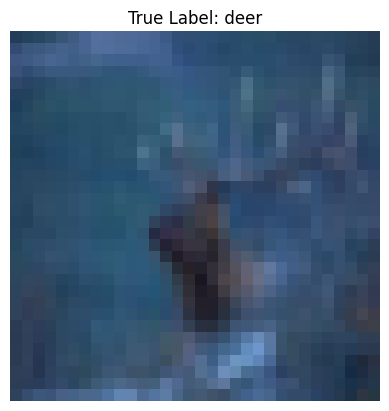

Top 5 Predictions:
1. airplane: 0.4000
   [INCORRECT PREDICTION]
2. deer: 0.4000
   [CORRECT PREDICTION]
3. bird: 0.2000
   [INCORRECT PREDICTION]
4. automobile: 0.0000
   [INCORRECT PREDICTION]
5. cat: 0.0000
   [INCORRECT PREDICTION]


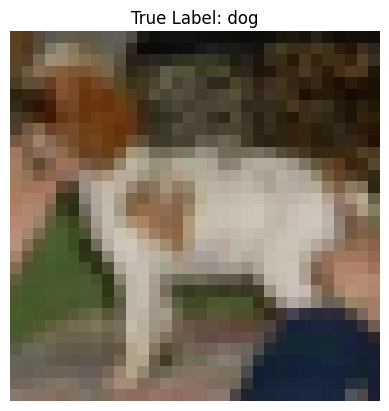

Top 5 Predictions:
1. dog: 0.4000
   [CORRECT PREDICTION]
2. ship: 0.4000
   [INCORRECT PREDICTION]
3. frog: 0.2000
   [INCORRECT PREDICTION]
4. airplane: 0.0000
   [INCORRECT PREDICTION]
5. automobile: 0.0000
   [INCORRECT PREDICTION]


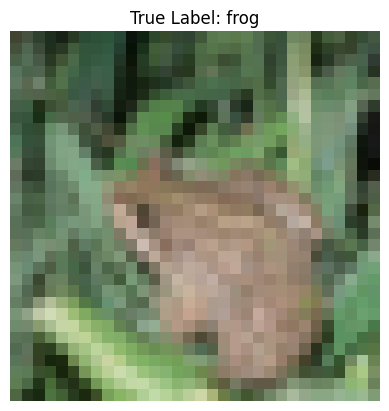

Top 5 Predictions:
1. frog: 0.4000
   [CORRECT PREDICTION]
2. airplane: 0.2000
   [INCORRECT PREDICTION]
3. cat: 0.2000
   [INCORRECT PREDICTION]
4. deer: 0.2000
   [INCORRECT PREDICTION]
5. automobile: 0.0000
   [INCORRECT PREDICTION]


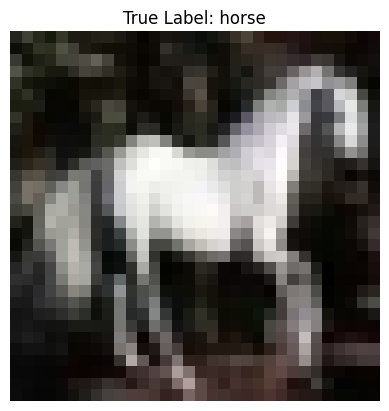

Top 5 Predictions:
1. frog: 0.4000
   [INCORRECT PREDICTION]
2. automobile: 0.2000
   [INCORRECT PREDICTION]
3. bird: 0.2000
   [INCORRECT PREDICTION]
4. dog: 0.2000
   [INCORRECT PREDICTION]
5. airplane: 0.0000
   [INCORRECT PREDICTION]


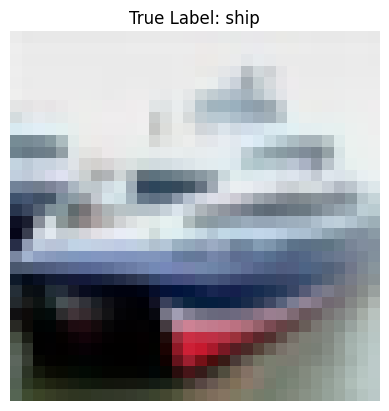

Top 5 Predictions:
1. ship: 0.8000
   [CORRECT PREDICTION]
2. automobile: 0.2000
   [INCORRECT PREDICTION]
3. airplane: 0.0000
   [INCORRECT PREDICTION]
4. bird: 0.0000
   [INCORRECT PREDICTION]
5. cat: 0.0000
   [INCORRECT PREDICTION]


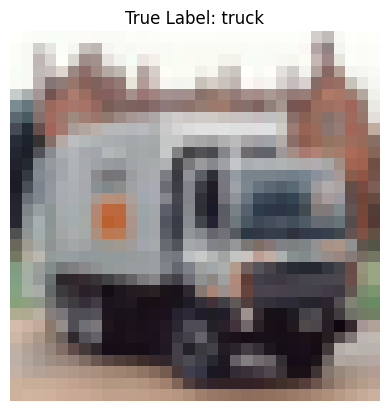

Top 5 Predictions:
1. automobile: 0.4000
   [INCORRECT PREDICTION]
2. horse: 0.2000
   [INCORRECT PREDICTION]
3. ship: 0.2000
   [INCORRECT PREDICTION]
4. truck: 0.2000
   [CORRECT PREDICTION]
5. airplane: 0.0000
   [INCORRECT PREDICTION]


In [20]:
# Function to display top 5 predictions for a test image from each category
def display_top_predictions():
    """
    Function to display the top 5 predictions for a test image from each category.

    This function iterates over each category and finds the first test image belonging
    to that category. It then predicts the class probabilities using the trained k-NN
    model and displays the top 5 predictions along with the true label and the image.
    """
    # Iterate over each category
    for category_index, category_label in enumerate(class_labels):
        # Find the first test image index belonging to the current category
        test_image_index = np.argmax(y_test == category_index)

        # Get the image, true label, and top predictions for the test image
        image = x_test[test_image_index]
        true_label = class_labels[y_test[test_image_index][0]]
        top_predictions = knn.predict_proba([x_test_gray[test_image_index].reshape(32*32)])

        # Display the image with its true label
        plt.imshow(image)
        plt.axis('off')
        plt.title("True Label: " + true_label)
        plt.show()

        # Display the top 5 predictions
        print("Top 5 Predictions:")
        sorted_indices = np.argsort(-top_predictions)
        for i in range(5):
            label = class_labels[sorted_indices[0][i]]
            probability = top_predictions[0][sorted_indices[0][i]]
            print(f"{i+1}. {label}: {probability:.4f}")

            # Compare actual label and predicted label
            if label == true_label:
                print("   [CORRECT PREDICTION]")
            else:
                print("   [INCORRECT PREDICTION]")

# Display top 5 predictions for a test image from each category
print("Step 5: Top 5 Predictions for a Test Image from Each Category:")
display_top_predictions()


Explanation of the above code:

1. "def display_top_predictions():": Defines a function named display_top_predictions that displays the top 5 predictions for a test image from each category.

2. "for category_index, category_label in enumerate(class_labels)": Begins a loop that iterates over each category.

3. "test_image_index = np.argmax(y_test == category_index)": Finds the index of the first test image belonging to the current category using np.argmax(). This index is used to retrieve the corresponding image for prediction.

4. "image = x_test[test_image_index]": Retrieves the image from the test dataset at the test_image_index and assigns it to the image variable.

5. "true_label = class_labels[y_test[test_image_index][0]]": Retrieves the true label of the test image by indexing into the class_labels list with y_test[test_image_index][0], which represents the label index.

6. "top_predictions = knn.predict_proba([x_test_gray[test_image_index].reshape(32*32)])": Uses the trained k-NN model (knn) to predict the class probabilities for the test image. The image is converted to grayscale (x_test_gray) and reshaped to match the expected input shape of the model. The predicted probabilities are assigned to the top_predictions variable.

7. "plt.imshow(image), plt.axis('off'), plt.title("True Label: " + true_label), plt.show()": Displays the test image with its true label using Matplotlib.

8. "print("Top 5 Predictions:")": Prints a message to indicate the start of displaying the top 5 predictions.

9. "sorted_indices = np.argsort(-top_predictions)": Sorts the predicted probabilities in descending order using np.argsort(). The sorted indices are assigned to the sorted_indices variable.

10. "for i in range(5):": Begins a loop that iterates 5 times to display the top 5 predictions.

11. "label = class_labels[sorted_indices[0][i]]": Retrieves the label corresponding to the i-th prediction from the class_labels list.

12. "probability = top_predictions[0][sorted_indices[0][i]]": Retrieves the probability of the i-th prediction from the top_predictions array.

13. "print(f"{i+1}. {label}: {probability:.4f}")": Prints the prediction number, label, and probability with 4 decimal places.

14. "if label == true_label:, print(" [CORRECT PREDICTION]"), print(" [INCORRECT PREDICTION]")": Compares the predicted label (label) with the true label (true_label) and prints a message indicating whether the prediction is correct or incorrect.

15. "print("Step 5: Top 5 Predictions for a Test Image from Each Category:")": Prints a message to indicate the start of displaying the top 5 predictions for a test image from each category.

16. "display_top_predictions()": Calls the display_top_predictions function to display the top 5 predictions for each category.





Step 5.2: Insights into its performance
---------------------------------------------
From the output of the top 5 predictions for test images from each category, we can gain insights into the performance of the k-nearest neighbors (k-NN) model. Here are some observations and discussions:

1. Overall Performance: 
The model achieves varying levels of accuracy for different categories. It correctly predicts the true label as the top prediction for some images, while for others, it ranks the true label lower in the top 5 predictions. This indicates that the model is not always accurate in classifying the images correctly.

2. Confusion Among Similar Categories: 
In some cases, the model exhibits confusion between similar categories. For example, in the case of the "airplane" category, the model predicts "ship" as the second-highest probability. Similarly, for the "automobile" category, the model predicts "ship" and other categories like "bird" and "frog" in the top 5 predictions. This suggests that the model may have difficulty distinguishing between certain visually similar categories.

3. Low Confidence in Predictions: 
The probabilities assigned to the top 5 predictions are often low, with values such as 0.4, 0.2, or even 0.0. This indicates that the model is not very confident in its predictions. The low confidence could be due to the challenges in differentiating between classes, as well as limitations in the k-NN algorithm's ability to capture complex patterns and relationships in the data.

4. Incorrect Predictions: 
In some cases, the model assigns higher probabilities to incorrect labels compared to the true label. For example, in the "cat" category, the model predicts "bird" with the highest probability, followed by "airplane" and "deer," while the true label is "cat." This indicates that the model is making errors in its predictions.

Based on these insights, we can conclude that the k-nearest neighbors (k-NN) algorithm may not be the most suitable choice for this image classification task on the CIFAR-10 dataset. The model's performance is limited, and it struggles with distinguishing between visually similar categories and assigning high confidence to the correct predictions. The k-NN algorithm's reliance on local similarity can be a limitation in capturing complex patterns and relationships in high-dimensional image data.

To improve the performance, alternative approaches such as deep learning models, convolutional neural networks (CNNs), or more advanced algorithms specifically designed for image classification could be explored. These models can learn hierarchical representations and capture intricate features, leading to better classification accuracy. Additionally, techniques such as data augmentation, regularization, and ensemble learning methods could be applied to enhance the model's generalization capability.

While the k-NN algorithm provides a simple and interpretable approach for image classification, it may not be the most effective method for the CIFAR-10 dataset. The performance can be improved by exploring more advanced models and techniques tailored for image classification tasks.

